# Data import
## Question 0 - Get common wikidata occupations

> Write a sparql query that retrieves the top 100 occupations on wikidata (wikidata property P106).

You may use the interface https://query.wikidata.org/ to try different queries. Here are some example sparql queries: https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples

In [1]:
query = """
SELECT ?o (COUNT(?person) AS ?count) WHERE 
{
   ?person wdt:P106 ?o
}
GROUP BY ?o
ORDER BY DESC(?count)
LIMIT 100
"""

The following assertion should pass if your answer is correct.

In [2]:
import requests

occupations = ['Q82955', 'Q937857', 'Q36180', 'Q33999', 'Q1650915', 'Q1028181', 'Q1930187', 'Q177220', 'Q1622272', 'Q49757', 'Q36834', 'Q40348', 'Q47064', 'Q639669', 'Q10800557', 'Q201788', 'Q2526255', 'Q43845', 'Q28389', 'Q42973', 'Q10871364', 'Q39631', 'Q193391', 'Q482980', 'Q483501', 'Q11513337', 'Q3665646', 'Q12299841', 'Q19204627', 'Q16533', 'Q81096', 'Q11774891', 'Q188094', 'Q1281618', 'Q333634', 'Q189290', 'Q250867', 'Q33231', 'Q2259451', 'Q42603', 'Q628099', 'Q37226', 'Q2309784', 'Q901', 'Q2066131', 'Q6625963', 'Q10798782', 'Q2374149', 'Q170790', 'Q4610556', 'Q185351', 'Q486748', 'Q3055126', 'Q753110', 'Q4964182', 'Q169470', 'Q158852', 'Q1234713', 'Q14089670', 'Q10873124', 'Q3282637', 'Q593644', 'Q947873', 'Q13414980', 'Q131524', 'Q11338576', 'Q15117302', 'Q488205', 'Q14467526', 'Q183945', 'Q10843402', 'Q13382576', 'Q13141064', 'Q214917', 'Q855091', 'Q644687', 'Q19595175', 'Q121594', 'Q2865819', 'Q16010345', 'Q1231865', 'Q2405480', 'Q350979', 'Q3400985', 'Q13365117', 'Q10833314', 'Q3621491', 'Q15981151', 'Q212980', 'Q16145150', 'Q1792450', 'Q15296811', 'Q15627169', 'Q2306091', 'Q4263842', 'Q806798', 'Q5716684', 'Q2516866', 'Q3387717', 'Q131512']

def evalSparql(query):
    return requests.post('https://query.wikidata.org/sparql', data=query, headers={
        'content-type': 'application/sparql-query',
        'accept': 'application/json',
        'user-agent': 'User:Tpt'
    }).json()['results']['bindings']

myOccupations = [val['o']['value'].replace('http://www.wikidata.org/entity/', '') 
                 for val in evalSparql(query)]
assert(frozenset(occupations) == frozenset(myOccupations))

## Occupations labels

We load the labels of the occupations from Wikidata

In [3]:
occupations_label = {}

query = """
SELECT DISTINCT ?o ?oLabel 
WHERE { 
    VALUES ?o { %s } 
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}"""% ' '.join('wd:' + o for o in occupations)

for result in evalSparql(query):
    occupations_label[result['o']['value'].replace('http://www.wikidata.org/entity/', '')] = result['oLabel']['value']

print(occupations_label)

{'Q82955': 'politician', 'Q121594': 'professor', 'Q177220': 'singer', 'Q169470': 'physicist', 'Q170790': 'mathematician', 'Q81096': 'engineer', 'Q201788': 'historian', 'Q188094': 'economist', 'Q212980': 'psychologist', 'Q214917': 'playwright', 'Q131524': 'entrepreneur', 'Q183945': 'record producer', 'Q193391': 'diplomat', 'Q189290': 'military officer', 'Q185351': 'jurist', 'Q350979': 'zoologist', 'Q483501': 'artist', 'Q482980': 'author', 'Q333634': 'translator', 'Q158852': 'conductor', 'Q486748': 'pianist', 'Q488205': 'singer-songwriter', 'Q250867': 'Catholic priest', 'Q593644': 'chemist', 'Q639669': 'musician', 'Q644687': 'illustrator', 'Q628099': 'association football manager', 'Q855091': 'guitarist', 'Q937857': 'association football player', 'Q947873': 'television presenter', 'Q806798': 'banker', 'Q1028181': 'painter', 'Q753110': 'songwriter', 'Q1234713': 'theologian', 'Q1281618': 'sculptor', 'Q1622272': 'university teacher', 'Q1792450': 'art historian', 'Q1650915': 'researcher', 'Q

We load *all* the labels of the occupations from Wikipedia

In [4]:
occupations_labels = {k: [v] for k, v in occupations_label.items()}

query = """
SELECT ?o ?altLabel 
WHERE {
  VALUES ?o { %s }
  ?o skos:altLabel ?altLabel . FILTER (lang(?altLabel) = "en")
}""" % ' '.join('wd:' + o for o in occupations) 

for result in evalSparql(query):
    occupations_labels[result['o']['value'].replace('http://www.wikidata.org/entity/', '')].append(result['altLabel']['value'])

print(occupations_labels)

{'Q82955': ['politician', 'political leader', 'polit.', 'political figure'], 'Q121594': ['professor', 'Prof.'], 'Q177220': ['singer', 'vocalist'], 'Q169470': ['physicist'], 'Q170790': ['mathematician'], 'Q81096': ['engineer'], 'Q201788': ['historian', 'historians', 'historiographer'], 'Q188094': ['economist'], 'Q212980': ['psychologist'], 'Q214917': ['playwright', 'Playwright, dramatist', 'dramatist', 'scriptwriter', 'playwrite'], 'Q131524': ['entrepreneur'], 'Q183945': ['record producer', 'music producer'], 'Q193391': ['diplomat'], 'Q189290': ['military officer', 'army officer', 'officer'], 'Q185351': ['jurist'], 'Q350979': ['zoologist', 'zooligist'], 'Q483501': ['artist'], 'Q482980': ['author'], 'Q333634': ['translator'], 'Q158852': ['conductor', 'Conducting'], 'Q486748': ['pianist'], 'Q488205': ['singer-songwriter', 'singer/songwriter', 'singer songwriter', 'singersongwriter'], 'Q250867': ['Catholic priest', 'Roman Catholic priest', 'Catholic presbyter', 'Roman Catholic presbyter'],

## Wikipedia articles

Here we load the training and the testing sets. To save memory space we use a generator that will read the file each time we iterate over the training or the testing examples.

In [5]:
import gzip
import json

def loadJson(filename):
    with gzip.open(filename, 'rt') as fp:
        for line in fp:
            yield json.loads(line)

class MakeIter(object):
    def __init__(self, generator_func, **kwargs):
        self.generator_func = generator_func
        self.kwargs = kwargs
    def __iter__(self):
        return self.generator_func(**self.kwargs)

training_set = MakeIter(loadJson, filename='wiki-train.json.gz')
testing_set = MakeIter(loadJson, filename='wiki-test.json.gz')

# Extract occupations from summaries

## Task 1 - Dictionnary extraction

> Using ```occupations_labels``` dictionnary, identify all occupations for each articles. Complete the function below to evaluate the accuracy of such approach. It will serve as a baseline.

In [7]:
label_to_occ = dict()
for key, occs in occupations_labels.items():
    for occ in occs:
        label_to_occ[occ.lower()] = key

def predict_dictionnary(example, occupations_labels):
    occs = []
    summary = example['summary'].lower()
    labels = label_to_occ.keys()
    for label in labels:
        if label in summary:
            occs.append(label_to_occ[label])
    return occs
    
def evaluate_dictionnary(training_set, occupations_labels):
    nexample = 0
    accuracy = 0.
    prediction = None
    for example in training_set:
        prediction = predict_dictionnary(example, occupations_labels)
        p = frozenset(prediction)
        g = frozenset(example['occupations'])
        accuracy += 1.*len(p & g) / len(p | g)
        nexample += 1
    return accuracy / nexample

evaluate_dictionnary(training_set, occupations_labels)

0.4842586814146957

## Task 2 - Simple neural network

We load the articles "summary" and we take the average of the word vectors.
This is done with spacy loaded with the fast text vectors.
To do the installation/loading [takes 8-10 minutes, dl 1.2Go]
```
pip3 install spacy
wget https://s3-us-west-1.amazonaws.com/fasttext-vectors/cc.en.300.vec.gz
python3 -m spacy init-model en /tmp/en_vectors_wiki_lg --vectors-loc cc.en.300.vec.gz
rm cc.en.300.vec.gz
```

In [ ]:
import spacy
from sklearn.model_selection import train_test_split

nlp = spacy.load('/tmp/en_vectors_wiki_lg')

def vectorize(dataset, nlp):
    result = {}
    for example in dataset:
        doc = nlp(example['summary'], disable=['parser', 'tagger'])
        result[example['title']] = {}
        result[example['title']]['vector'] = doc.vector
        result[example['title']]['summary'] = example['summary']
        if 'occupations' in example:
            result[example['title']]['occupations'] = example['occupations']
    return result
    
vectorized_training = vectorize(training_set, nlp)
vectorized_testing = vectorize(testing_set, nlp)
nlp = None

In [10]:
len(vectorized_training)

427798

In [11]:
v = vectorized_training['George_Washington']['vector']
print(v)

[-1.45162819e-02 -2.45802402e-02 -4.59302496e-03 -4.09372151e-02
 -4.47662771e-02 -4.18604538e-03 -3.15232435e-03 -1.44802360e-02
 -1.68499984e-02 -3.69651243e-03 -1.16255814e-02  1.43651171e-02
  2.02674349e-03 -5.88953542e-03 -2.17011590e-02  1.02302311e-02
 -2.49313917e-02 -5.65232616e-03 -2.25581434e-02  8.29069968e-03
 -1.44069805e-03  2.25197673e-02 -6.81395701e-04 -1.37232570e-02
 -1.26674427e-02 -3.35569866e-02  1.10627888e-02 -2.37208814e-03
 -2.30000000e-02  7.58616179e-02 -5.03487710e-04 -2.51116175e-02
  9.26511642e-03 -2.52558179e-02 -1.51058156e-02 -9.51627828e-03
  1.17523270e-02  1.22441910e-03  1.08139520e-03  3.39302444e-03
  2.20116391e-03  1.46860480e-02 -1.43686021e-02  5.76395402e-03
  1.74162779e-02 -4.76220921e-02 -1.72569733e-02 -1.49988411e-02
 -1.77732538e-02  1.58907007e-02 -7.23255938e-03  2.43825577e-02
 -2.73104683e-02 -3.67430188e-02 -1.48802334e-02 -1.34825567e-02
 -3.14348824e-02  1.95930228e-02 -6.68605033e-04 -9.24302172e-03
  1.56976283e-04 -1.65674

In [12]:
v.shape

(300,)

## Split the vectorized_training into train and test set

In [13]:
def splitDict(d, percent):
    split_idx = int(len(d) * percent)
    d1 = dict(list(d.items())[: split_idx])
    d2 = dict(list(d.items())[split_idx:])                

    return d1, d2

vectorized_training_test, vectorized_training_train = splitDict(vectorized_training, 0.2)

In [14]:
len(vectorized_training_train)

342239

In [15]:
# We encode the data
import numpy as np

def encode_data(vectorized_data):
    X = np.array([vectorized_data[article]['vector'] for article in vectorized_data])
    y = np.array([[(1 if occupation in vectorized_data[article]['occupations'] else 0)
                        for occupation in occupations ] for article in vectorized_data])
    return X, y

X_train, y_train = encode_data(vectorized_training_train)
X_test, y_test = encode_data(vectorized_training_test)

In [16]:
print(len(y_train[0]))

100


In [17]:
X_train.shape

(342239, 300)

In [18]:
y_train.shape

(342239, 100)

> Using keras, define a sequential neural network with two layers. Use categorical_crossentropy as a loss function and softmax as the activation function of the output layer

You can look into the documentation here: https://keras.io/getting-started/sequential-model-guide/

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(512, activation='relu', input_dim=300))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

optimizer = Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Using TensorFlow backend.


In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.1)

Train on 308015 samples, validate on 34224 samples
Epoch 1/50
308015/308015 [==============================] - 3s 10us/step - loss: 3.5608 - acc: 0.4881 - val_loss: 2.0247 - val_acc: 0.6362
Epoch 2/50
308015/308015 [==============================] - 1s 5us/step - loss: 2.3868 - acc: 0.6581 - val_loss: 1.7224 - val_acc: 0.6907
Epoch 3/50
308015/308015 [==============================] - 1s 4us/step - loss: 2.1847 - acc: 0.6880 - val_loss: 1.6056 - val_acc: 0.7125
Epoch 4/50
308015/308015 [==============================] - 1s 4us/step - loss: 2.0853 - acc: 0.7033 - val_loss: 1.5498 - val_acc: 0.7234
Epoch 5/50
308015/308015 [==============================] - 1s 4us/step - loss: 2.0255 - acc: 0.7115 - val_loss: 1.5037 - val_acc: 0.7321
Epoch 6/50
308015/308015 [==============================] - 1s 4us/step - loss: 1.9833 - acc: 0.7176 - val_loss: 1.4793 - val_acc: 0.7359
Epoch 7/50
308015/308015 [==============================] - 1s 4us/step - loss: 1.9517 - acc: 0.7213 - val_loss: 1.4538 

> Complete the function predict: output the list of occupations where the corresponding neuron on the output layer of our model has a value > 0.1

In [25]:
def predict_nn(model, article_name, vectorized_dataset):
    input_vector = vectorized_dataset[article_name]['vector'].reshape((1, 300))
    scores = model.predict(input_vector).reshape(100)
    predictions = np.where(scores > 0.1)[0]
#     print(scores[predictions])
    return set(np.array(occupations)[predictions])

print(predict_nn(model, 'Elvis_Presley', vectorized_training))
# should be {'Q177220'}

{'Q177220', 'Q639669', 'Q33999'}


In [22]:
def evaluate_nn(vectorized_training, model):
    nexample = 0
    accuracy = 0.
    prediction = None
    for article_name in vectorized_training:
        prediction = predict_nn(model, article_name, vectorized_training)
        p = frozenset(prediction)
        g = frozenset(vectorized_training[article_name]['occupations'])
        accuracy += 1.*len(p & g) / len(p | g)
        nexample += 1
    return accuracy / nexample

In [23]:
print(evaluate_nn(vectorized_training_train, model))
print(evaluate_nn(vectorized_training_test, model))

0.7048576643356244
0.6662116943899452


## Task 3 Your approach

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GRU, Dropout, Conv1D, MaxPooling1D, MaxPooling1D, Bidirectional, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [7]:
# Extract the dataset into summaries, titles and occupations
def parse(dataset):
    titles = []
    summaries = []
    occs = []
    for example in dataset:
        titles.append(example['title'])
        summaries.append(example['summary'])        
        if 'occupations' in example:
            occs.append(example['occupations'])
        else:
            occs.append([])
    return titles, summaries, occs
    
titles_train, summaries_train, occs_train = parse(training_set)

s = int(len(titles_train) * 0.8)
titles_train_train, summaries_train_train, occs_train_train = titles_train[:s], summaries_train[:s], occs_train[:s]
titles_train_test, summaries_train_test, occs_train_test = titles_train[s:], summaries_train[s:], occs_train[s:]

titles_test, summaries_test, occs_test = parse(testing_set)

In [8]:
n_samples = len(titles_train_train)
maxlen = 300
training_samples = int(n_samples * 0.9)
validation_samples = n_samples - training_samples
max_words = 400000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(summaries_train_train)

# convert text to sequences
sequences =  tokenizer.texts_to_sequences(summaries_train_train)
sequences_test = tokenizer.texts_to_sequences(summaries_train_test)

word_index = tokenizer.word_index
print('Found', len(word_index), 'unique tokens.')



Found 370295 unique tokens.


In [9]:
def convert_occs_to_labels(occupations, occs_train):
    labels = []
    for i in range(len(occs_train)):
        label = []
        for occ in occupations:
            if occ in occs_train[i]:
                label.append(1)
            else:
                label.append(0)
        labels.append(label)
    return np.array(labels)


In [10]:
data = pad_sequences(sequences, maxlen=maxlen)
data_test = pad_sequences(sequences_test, maxlen=maxlen)
labels = convert_occs_to_labels(occupations, occs_train_train)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# shuffle the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# split into training and testing set
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (342333, 300)
Shape of label tensor: (342333, 100)


In [11]:
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found', len(embeddings_index), 'word vectors.')

Found 400000 word vectors.


In [12]:
# Build embedding matrix to load into embedding layer
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))


for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [17]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

model.add(Conv1D(64,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))

model.add(Conv1D(128,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))

model.add(Conv1D(256,kernel_size=3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.1))


model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, return_sequences=True, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Bidirectional(GRU(64, recurrent_dropout = 0.1, dropout = 0.1)))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# model.add(Dense(100, activation='softmax'))
model.add(Dense(100, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          120000000 
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 300, 128)          115328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300, 128)          512       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 256)          98560     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 256)          1024      
__________

In [18]:
# Load the Glove embedding in the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # we will not update this layer during training

In [19]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfb
from keras import backend as K

POS_WEIGHT = 10  # multiplier for positive targets

def weighted_binary_crossentropy(target, output):
    # transform back to logits
    _epsilon = tfb._to_tensor(tfb.epsilon(), output.dtype.base_dtype)
    output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
    output = tf.log(output / (1 - output))
    # compute weighted loss
    loss = tf.nn.weighted_cross_entropy_with_logits(targets=target,
                                                    logits=output,
                                                    pos_weight=POS_WEIGHT)
    return tf.reduce_mean(loss, axis=-1)



In [20]:
callbacks = [
    EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=7,
                              verbose=0, mode='auto'),
    ReduceLROnPlateau(monitor='val_loss', 
                      factor=0.1, 
                      patience=5, 
                      verbose=1, 
                      mode='auto', 
                      min_delta=0.0001, 
                      cooldown=0, 
                      min_lr=0),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1, mode='min')
]

model.compile(optimizer='rmsprop',
#     loss='categorical_crossentropy',
#     loss='binary_crossentropy',
    loss=weighted_binary_crossentropy,
    metrics=['acc'])

history = model.fit(x_train, y_train,
    epochs=50,
    callbacks=callbacks,
    batch_size=1000,
    validation_data=(x_val, y_val))

Train on 308099 samples, validate on 34234 samples
Epoch 1/50
308099/308099 [==============================] - 137s 446us/step - loss: 0.3043 - acc: 0.4631 - val_loss: 0.1682 - val_acc: 0.5308

Epoch 00001: val_loss improved from inf to 0.16816, saving model to best_model.h5
Epoch 2/50
308099/308099 [==============================] - 127s 414us/step - loss: 0.1223 - acc: 0.6662 - val_loss: 0.1303 - val_acc: 0.6647

Epoch 00002: val_loss improved from 0.16816 to 0.13028, saving model to best_model.h5
Epoch 3/50
308099/308099 [==============================] - 128s 414us/step - loss: 0.1044 - acc: 0.7172 - val_loss: 0.1119 - val_acc: 0.6801

Epoch 00003: val_loss improved from 0.13028 to 0.11191, saving model to best_model.h5
Epoch 4/50
308099/308099 [==============================] - 128s 415us/step - loss: 0.0971 - acc: 0.7319 - val_loss: 0.0985 - val_acc: 0.7289

Epoch 00004: val_loss improved from 0.11191 to 0.09853, saving model to best_model.h5
Epoch 5/50
308099/308099 [===========

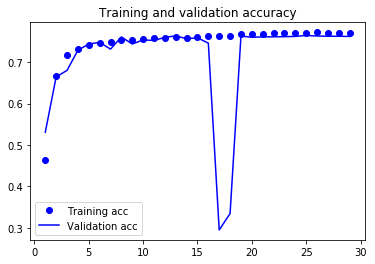

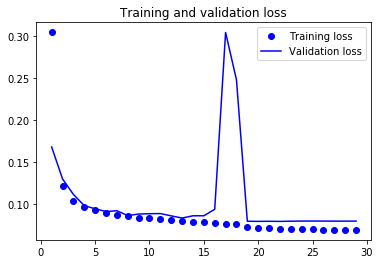

In [22]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
model.load_weights("best_model.h5")

In [27]:
title = 'Elvis_Presley'
idx = titles_train_train.index(title)
input_vector = data[idx].reshape(1, maxlen)
print(occs_train_train[idx])

['Q177220', 'Q10800557', 'Q28389', 'Q486748', 'Q855091']


In [28]:
def predict_nn_2(model, input_vector, print_score = False):
    
    scores = model.predict(input_vector).reshape(100)
    predictions1 = np.where(scores > 0.5)[0]
    predictions2 = np.where(scores > 0.6)[0]
    predictions3 = np.where(scores > 0.7)[0]
    predictions4 = np.where(scores > 0.8)[0]
    predictions5 = np.where(scores > 0.9)[0]
    predictions6 = np.where(scores > 0.95)[0]
    if print_score:
        print(scores[predictions1])
        print(scores[predictions2])
        print(scores[predictions3])
        print(scores[predictions4])
        print(scores[predictions5])
        print(scores[predictions6])
    res1 = set(np.array(occupations)[predictions1])
    res2 = set(np.array(occupations)[predictions2])
    res3 = set(np.array(occupations)[predictions3])
    res4 = set(np.array(occupations)[predictions4])
    res5 = set(np.array(occupations)[predictions5])
    res6 = set(np.array(occupations)[predictions6])
    return res1, res2, res3, res4, res5, res6

title = 'Elvis_Presley'
idx = titles_train.index(title)
print(summaries_train_train[idx])

print(predict_nn_2(model, input_vector, print_score=True))
# should be {'Q177220'}

Elvis Aaron Presley was an American singer and actor. Regarded as one of the most significant cultural icons of the 20th century, he is often referred to as the "King of Rock and Roll" or simply the "King".
[0.63429046 0.60777783 0.95774215 0.5449958 ]
[0.63429046 0.60777783 0.95774215]
[0.95774215]
[0.95774215]
[0.95774215]
[0.95774215]
({'Q82955', 'Q40348', 'Q193391', 'Q16533'}, {'Q82955', 'Q40348', 'Q193391'}, {'Q193391'}, {'Q193391'}, {'Q193391'}, {'Q193391'})


In [29]:
len(titles_train_test)

85584

In [30]:
def evaluate_nn_2(titles, input_vectors, occs, model):
    nexample = len(titles)
    accuracy1 = 0.
    accuracy2 = 0.
    accuracy3 = 0.
    accuracy4 = 0.
    accuracy5 = 0.
    accuracy6 = 0.
    prediction = None
    for i in range(len(titles)):        
        input_vector = input_vectors[i].reshape(1, -1)
        prediction1, prediction2, prediction3, prediction4, prediction5, prediction6 = predict_nn_2(model, input_vector)
        p1 = frozenset(prediction1)
        p2 = frozenset(prediction2)
        p3 = frozenset(prediction3)
        p4 = frozenset(prediction4)
        p5 = frozenset(prediction5)
        p6 = frozenset(prediction6)
        g = frozenset(occs[i])
        accuracy1 += 1. / nexample * len(p1 & g) / len(p1 | g)
        accuracy2 += 1. / nexample * len(p2 & g) / len(p2 | g)
        accuracy3 += 1. / nexample * len(p3 & g) / len(p3 | g)
        accuracy4 += 1. / nexample * len(p4 & g) / len(p4 | g)
        accuracy5 += 1. / nexample * len(p5 & g) / len(p5 | g)
        accuracy6 += 1. / nexample * len(p5 & g) / len(p6 | g)
        if i % 1000 == 0:
            print("=========================")
            print(round(i / nexample, 4), " : ", round(accuracy1, 4))
            print(round(i / nexample, 4), " : ", round(accuracy2, 4))
            print(round(i / nexample, 4), " : ", round(accuracy3, 4))
            print(round(i / nexample, 4), " : ", round(accuracy4, 4))
            print(round(i / nexample, 4), " : ", round(accuracy5, 4))
            print(round(i / nexample, 4), " : ", round(accuracy6, 4))
    return accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6

# print(evaluate_nn_2(titles_train, summaries_train, occs_train, model))
print(evaluate_nn_2(titles_train_test, data_test, occs_train_test, model))

0.0  :  0.0
0.0  :  0.0
0.0  :  0.0
0.0  :  0.0
0.0  :  0.0
0.0  :  0.0
0.0117  :  0.0075
0.0117  :  0.008
0.0117  :  0.0083
0.0117  :  0.0087
0.0117  :  0.0087
0.0117  :  0.009


KeyboardInterrupt: 

In [37]:
model.save_weights('model_7986.h5')

In [ ]:
print(evaluate_nn_2(titles_train_train, data, occs_train_train, model))

***IMPORTANT*** Output format of requested file 'results.json.gz': each line must be a json string representing a dictionnary:
> ```{ 'title': THE_ARTICLE_NAME, 'prediction': [THE_LIST_OF_OCCUPATIONS]}```

In [14]:
# For example if testset_solutions is a dictionnary: article_name (key) -> prediction_list (value) use this function:
def export(testset_solutions):
    with gzip.open('results.json.gz', 'wt') as output:
        for article in testset_solutions:
            output.write(json.dumps({'title':article, 'prediction':testset_solutions[article]}) + "\n")